# Ford GoBike System Dataset Exploration
## by David Fakolujo

## Investigation Overview


My focus for this project were the relationships my main feature of interest (user_type) had with the gender and age supporting features.


## Dataset Overview

The dataset contained information of 183,412 individual rides made in a bike-sharing system in February 2019, covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

bikes = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# drop all rows with missing data

bikes.dropna(inplace = True)

In [4]:
# create new columns for the age, start days and start hours of the rides to aid in the analysis

bikes['age'] = 2019 - bikes['member_birth_year']
bikes['start_day'] = pd.DatetimeIndex(bikes['start_time']).day_name()
bikes['start_hour'] = pd.DatetimeIndex(bikes['start_time']).hour

In [5]:
# Convert user_type, member_gender, bike_share_for_all_trip and start_day columns to category datatype

to_category = ['user_type', 'member_gender', 'bike_share_for_all_trip', 'start_day']
for category in to_category:
    bikes[category] = bikes[category].astype('category')

In [6]:
# Convert start_time and end_time columns to datetime datatype

to_date = ['start_time', 'end_time']
for date in to_date:
    bikes[date] = pd.to_datetime(bikes[date])

In [7]:
# Convert start_station_id, end_station_id and bike_id columns to object datatype

to_object = ['start_station_id', 'end_station_id', 'bike_id']
for obj in to_object:
    bikes[obj] = bikes[obj].astype('object')

In [8]:
# Convert member_birth_year to integer datatype

bikes['member_birth_year'] = bikes['member_birth_year'].astype('int')

## Distribution of User Types

Subscribers made about ten times more rentals than customers in February 2019, indicating that most of the people that regularly make use of the bike sharing system are subscribers

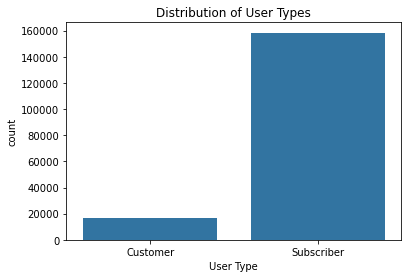

In [9]:
# plot a bar chart of the user_type feature

base_color = sb.color_palette()[0]

sb.countplot(data = bikes, x = 'user_type', color = base_color)
plt.title('Distribution of User Types')
plt.xlabel('User Type');

## Distribution of Member Genders

Majority of the rentals made were done by males. The female gender rented about three times less than the male gender, while few individuals of about 5000 selected other as their gender

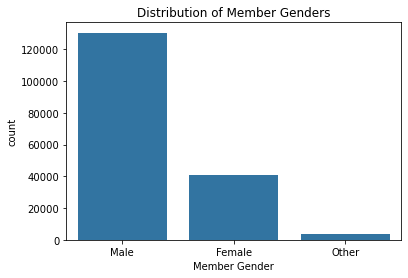

In [10]:
# plot a bar chart of the member_gender feature

freq = bikes['member_gender'].value_counts()

# Get the indexes of the Series
gender_order = freq.index

# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sb.countplot(data = bikes, x = 'member_gender', color = base_color, order = gender_order)
plt.title('Distribution of Member Genders')
plt.xlabel('Member Gender');

## Distribution of Age

Rentals made by people aged 80 and above were dropped to remove the unusual outliers. The distribution of the resulting data shows that most rentals were made by people in the age range of late twenties and early thirties

In [11]:
# drop rentals made by people aged 80 and above

bikes = bikes[bikes['age'] < 80] 

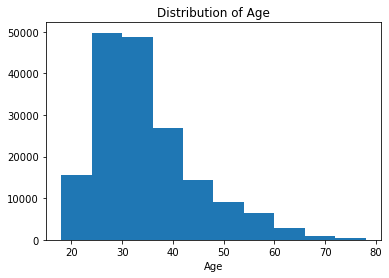

In [12]:
# plot a new histogram of the age distribution

plt.hist(data = bikes, x = 'age')
plt.title('Distribution of Age')
plt.xlabel('Age');

## User Type by Member Gender 

There is a similar distribution of gender across the two user types. For both customers and subscribers, a higher number of rentals were made by males with a smaller number of rentals made by females, while rentals made by others were very little in comparison to the other genders. This shows that the user types had no effect on the distribution of genders in the data

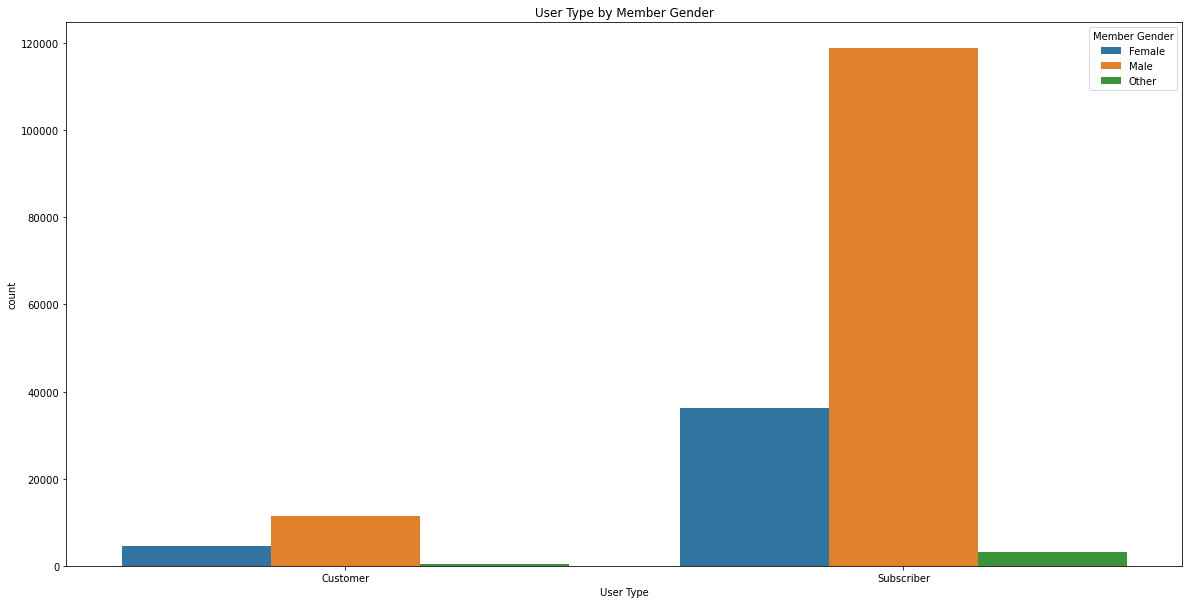

In [13]:
# plot a clustered bar of user type and gender

def clustered_bar_chart(x, hue):
    plt.figure(figsize=(20, 10))
    sb.countplot(data = bikes, x = x, hue = hue)

clustered_bar_chart('user_type', 'member_gender')
plt.title('User Type by Member Gender')
plt.xlabel('User Type')
plt.legend(title = 'Member Gender');

## Age against User Type

Identical to the gender distribution across user type, there was a similar distribution of ages across the two user types. The plot shows that for customers, most rentals were made by people aged 30, with a gradual decline upwards and downwards, while for subscribers, most rentals were made by indiviuals between mid twenties and early thirties. In addition, both categories had longer tails which show that a lot fewer rentals were made as ages increased.Both categories also have very similar quartiles.

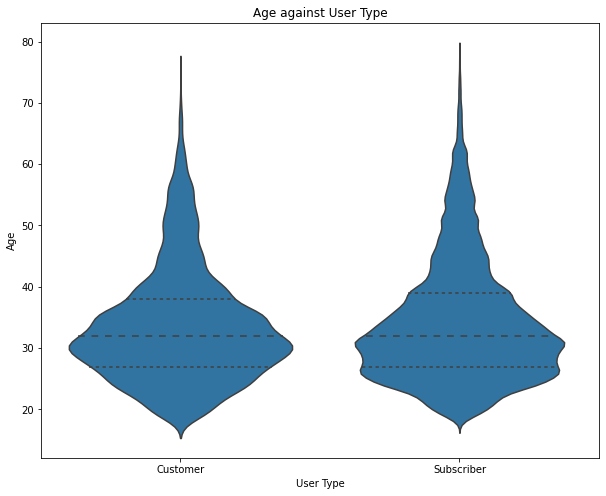

In [14]:
# plot a violin plot of age against user_type

plt.figure(figsize=(10, 8))

sb.violinplot(data = bikes, x = 'user_type', y = 'age', color = base_color, inner = 'quartile');
plt.title('Age against User Type')
plt.xlabel('User Type')
plt.ylabel('Age');

## Age against Member Gender

The boxplots show that females had the lowest median age that made rentals, followed by males which was slightly higher, while others had the highest median age, with all median ages being in the early thirties.

There were many outliers across the three gender categories, indicating the drastic reduction in rentals as ages reduced, similar to the observation made in the violin plot of age against.

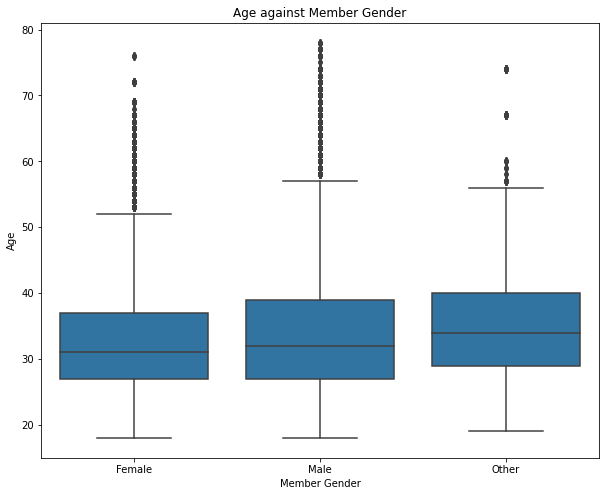

In [15]:
# plot a box plot of age against member_gender

plt.figure(figsize=(10, 8))

sb.boxplot(data = bikes, x = 'member_gender', y = 'age', color = base_color)
plt.title('Age against Member Gender')
plt.xlabel('Member Gender')
plt.ylabel('Age');

## Age against User Type, segmented by Member Gender

The boxplots show that for both user types, females had the lowest median age that made rentals, followed by males which was slightly higher, while others had the highest median age, with all median ages being in the early thirties. The females in both user types had similar quartiles, males in both user types also had similar quartiles; however, the other category had smaller quartiles in customers than in subscribers. Also, all genders across both customers and subsribers had outliers due to the drastic reduction in rentals as ages increased.

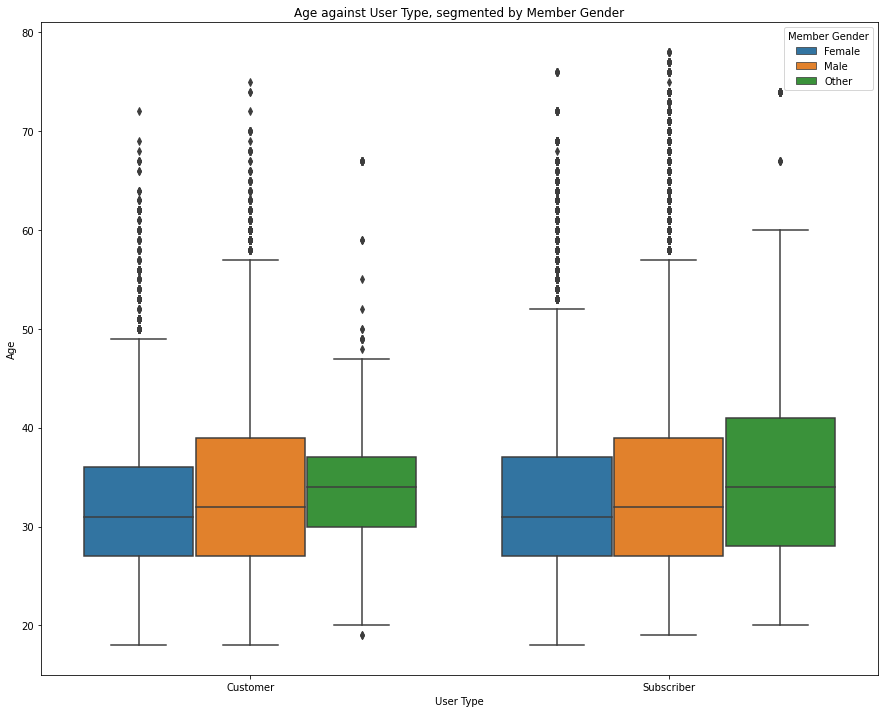

In [16]:
# plot box plots of age against user_type and segment on the different genders

plt.figure(figsize=(15, 12))
sb.boxplot(data=bikes, x='user_type', y='age', hue = 'member_gender')
plt.title('Age against User Type, segmented by Member Gender')
plt.xlabel('User Type')
plt.ylabel('Age')
plt.legend(title = 'Member Gender');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert explanatory_data_visualization.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook explanatory_data_visualization.ipynb to slides
[NbConvertApp] Writing 716037 bytes to explanatory_data_visualization.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/explanatory_data_visualization.slides.html
Use Control-C to stop this server
